In [1]:
## General libraries
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import auc, roc_curve, classification_report
import seaborn as sns
from pdpbox import pdp, get_dataset, info_plots

import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

## Machine Learning libraries
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_validate,train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import xgboost as xgb
from xgboost import XGBClassifier

# magic word for producing visualizations in notebook
%matplotlib inline
df = pd.read_csv("data/defaultsmall.csv",sep=',')

In [2]:
df.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default,1003.658899,199.8245349,8.28728978,3.093225456,1.944370648,29.20331683,1.498007487,0.115042467,Mean
0,19970101,2178.85,250.00,6.0,4,1,0,2,0,439.224768,335.437237,7.108381,1.560034,2.31555,13.277721,0.500006,0.31908,SD
1,19970101,1543.65,1543.65,6.0,1,0,0,2,0,999.000000,100.000000,6.000000,3.000000,1.00000,28.000000,1.000000,0.00000,Median
2,19970101,1107.67,125.00,5.0,1,0,0,2,0,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.00000,min
3,19970102,950.44,237.61,9.0,5,0,0,1,0,9371.250000,9371.250000,120.000000,5.000000,8.00000,99.000000,2.000000,1.00000,Max
4,19970103,1436.00,250.00,9.0,3,0,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24843 entries, 0 to 24842
Data columns (total 18 columns):
enrolldt       24843 non-null int64
price          24843 non-null float64
downpmt        24843 non-null float64
monthdue       24843 non-null float64
pmttype        24843 non-null int64
use            24843 non-null int64
age            24843 non-null int64
gender         24843 non-null int64
default        24843 non-null int64
1003.658899    4 non-null float64
199.8245349    4 non-null float64
8.28728978     4 non-null float64
3.093225456    4 non-null float64
1.944370648    4 non-null float64
29.20331683    4 non-null float64
1.498007487    4 non-null float64
0.115042467    4 non-null float64
Mean           4 non-null object
dtypes: float64(11), int64(6), object(1)
memory usage: 3.4+ MB


In [4]:
df.columns

Index(['enrolldt', 'price', 'downpmt', 'monthdue', 'pmttype', 'use', 'age',
       'gender', 'default', '1003.658899', '199.8245349', '8.28728978',
       '3.093225456', '1.944370648', '29.20331683', '1.498007487',
       '0.115042467', 'Mean'],
      dtype='object')

In [5]:
df = df[['enrolldt', 'price', 'downpmt', 'monthdue', 'pmttype', 'use', 'age',
       'gender', 'default']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24843 entries, 0 to 24842
Data columns (total 9 columns):
enrolldt    24843 non-null int64
price       24843 non-null float64
downpmt     24843 non-null float64
monthdue    24843 non-null float64
pmttype     24843 non-null int64
use         24843 non-null int64
age         24843 non-null int64
gender      24843 non-null int64
default     24843 non-null int64
dtypes: float64(3), int64(6)
memory usage: 1.7 MB


In [7]:
df.describe()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
count,2.484300e+04,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000
mean,1.997814e+07,1003.658899,199.824535,8.287290,3.093225,1.944371,29.203317,1.498007,0.115042
std,6.825852e+03,439.224768,335.437237,7.108381,1.560034,2.315550,13.277721,0.500006,0.319080
min,1.997010e+07,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.997082e+07,699.000000,49.000000,5.500000,1.000000,0.000000,22.000000,1.000000,0.000000
50%,1.998033e+07,999.000000,100.000000,6.000000,3.000000,1.000000,28.000000,1.000000,0.000000
75%,1.998101e+07,1249.000000,175.000000,9.000000,4.000000,3.000000,36.000000,2.000000,0.000000
max,1.999033e+07,9371.250000,9371.250000,120.000000,5.000000,8.000000,99.000000,2.000000,1.000000


In [8]:
df['enrolldt_ts'] = pd.to_datetime(df['enrolldt'],format='%Y%m%d', errors='coerce')

In [9]:
df.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default,enrolldt_ts
0,19970101,2178.85,250.00,6.0,4,1,0,2,0,1997-01-01
1,19970101,1543.65,1543.65,6.0,1,0,0,2,0,1997-01-01
2,19970101,1107.67,125.00,5.0,1,0,0,2,0,1997-01-01
3,19970102,950.44,237.61,9.0,5,0,0,1,0,1997-01-02
4,19970103,1436.00,250.00,9.0,3,0,0,2,0,1997-01-03


In [10]:
df['sex'] = df['gender'] -1

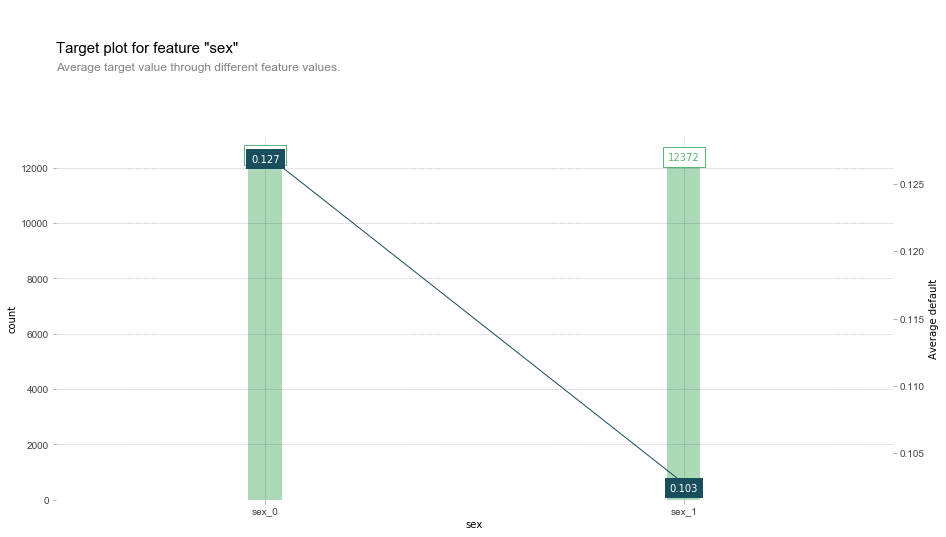

In [11]:

fig, axes, summary_df = info_plots.target_plot(
    df=df, feature='sex', feature_name='sex', target='default'
)


In [12]:
summary_df

,x,display_column,count,default
0,0,sex_0,12471,0.127255
1,1,sex_1,12372,0.102732


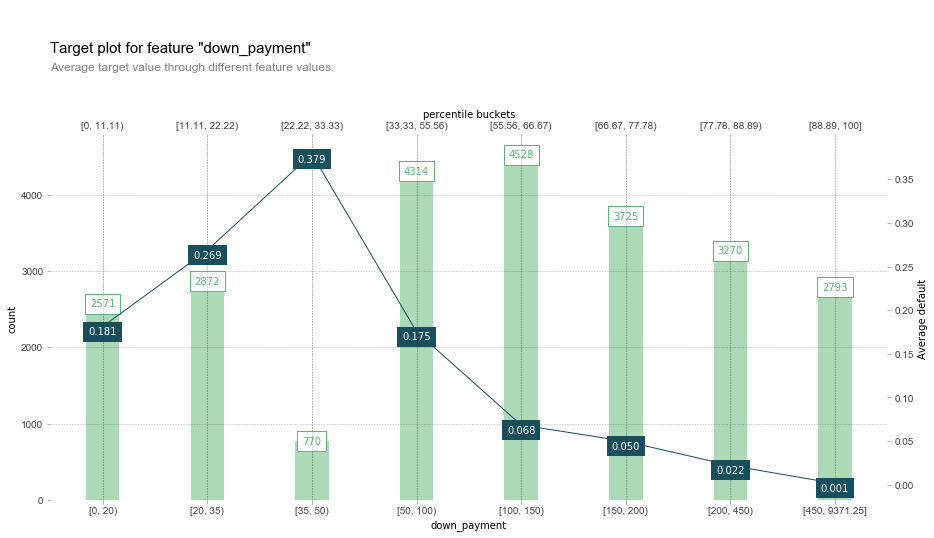

In [13]:
fig, axes, summary_df = info_plots.target_plot(
    df=df, feature='downpmt', feature_name='down_payment', target='default', show_percentile=True
)

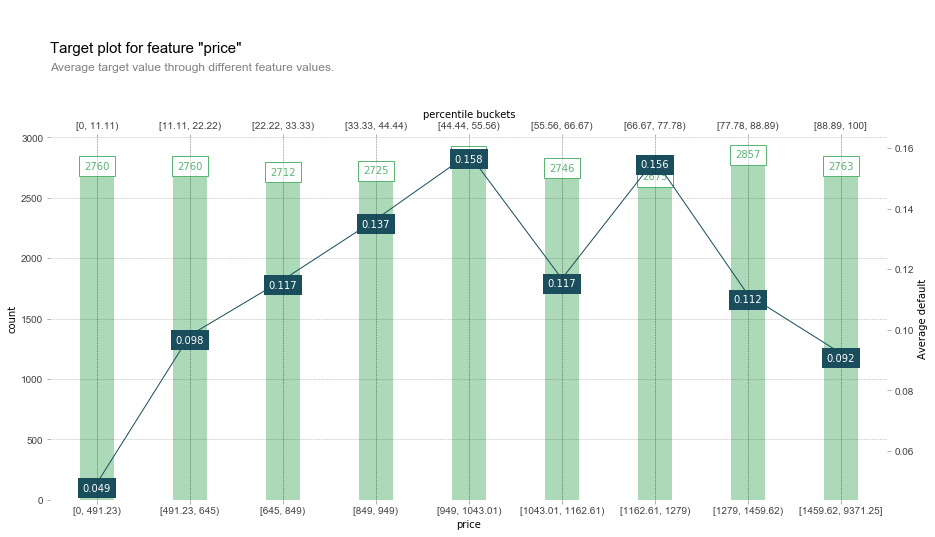

In [14]:
fig, axes, summary_df = info_plots.target_plot(
    df=df, feature='price', feature_name='price', target='default', show_percentile=True
)

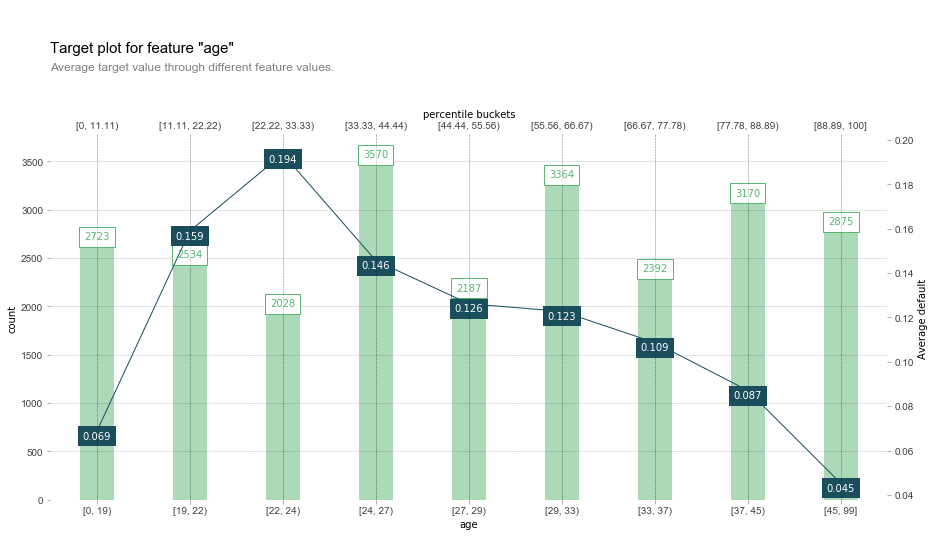

In [15]:
fig, axes, summary_df = info_plots.target_plot(
    df=df, feature='age', feature_name='age', target='default', show_percentile=True
)

In [16]:
df.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default,enrolldt_ts,sex
0,19970101,2178.85,250.00,6.0,4,1,0,2,0,1997-01-01,1
1,19970101,1543.65,1543.65,6.0,1,0,0,2,0,1997-01-01,1
2,19970101,1107.67,125.00,5.0,1,0,0,2,0,1997-01-01,1
3,19970102,950.44,237.61,9.0,5,0,0,1,0,1997-01-02,0
4,19970103,1436.00,250.00,9.0,3,0,0,2,0,1997-01-03,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24843 entries, 0 to 24842
Data columns (total 11 columns):
enrolldt       24843 non-null int64
price          24843 non-null float64
downpmt        24843 non-null float64
monthdue       24843 non-null float64
pmttype        24843 non-null int64
use            24843 non-null int64
age            24843 non-null int64
gender         24843 non-null int64
default        24843 non-null int64
enrolldt_ts    24843 non-null datetime64[ns]
sex            24843 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 2.1 MB


In [18]:
df.columns

Index(['enrolldt', 'price', 'downpmt', 'monthdue', 'pmttype', 'use', 'age',
       'gender', 'default', 'enrolldt_ts', 'sex'],
      dtype='object')

In [19]:
dff = df[['price', 'downpmt', 'monthdue', 'pmttype', 'use', 'age',
       'gender', 'sex', 'default']].copy(deep=True)

In [20]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24843 entries, 0 to 24842
Data columns (total 9 columns):
price       24843 non-null float64
downpmt     24843 non-null float64
monthdue    24843 non-null float64
pmttype     24843 non-null int64
use         24843 non-null int64
age         24843 non-null int64
gender      24843 non-null int64
sex         24843 non-null int64
default     24843 non-null int64
dtypes: float64(3), int64(6)
memory usage: 1.7 MB


In [21]:
dff['default'] = dff['default'].map({1:'T',0:'F'})

In [22]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24843 entries, 0 to 24842
Data columns (total 9 columns):
price       24843 non-null float64
downpmt     24843 non-null float64
monthdue    24843 non-null float64
pmttype     24843 non-null int64
use         24843 non-null int64
age         24843 non-null int64
gender      24843 non-null int64
sex         24843 non-null int64
default     24843 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 1.7+ MB


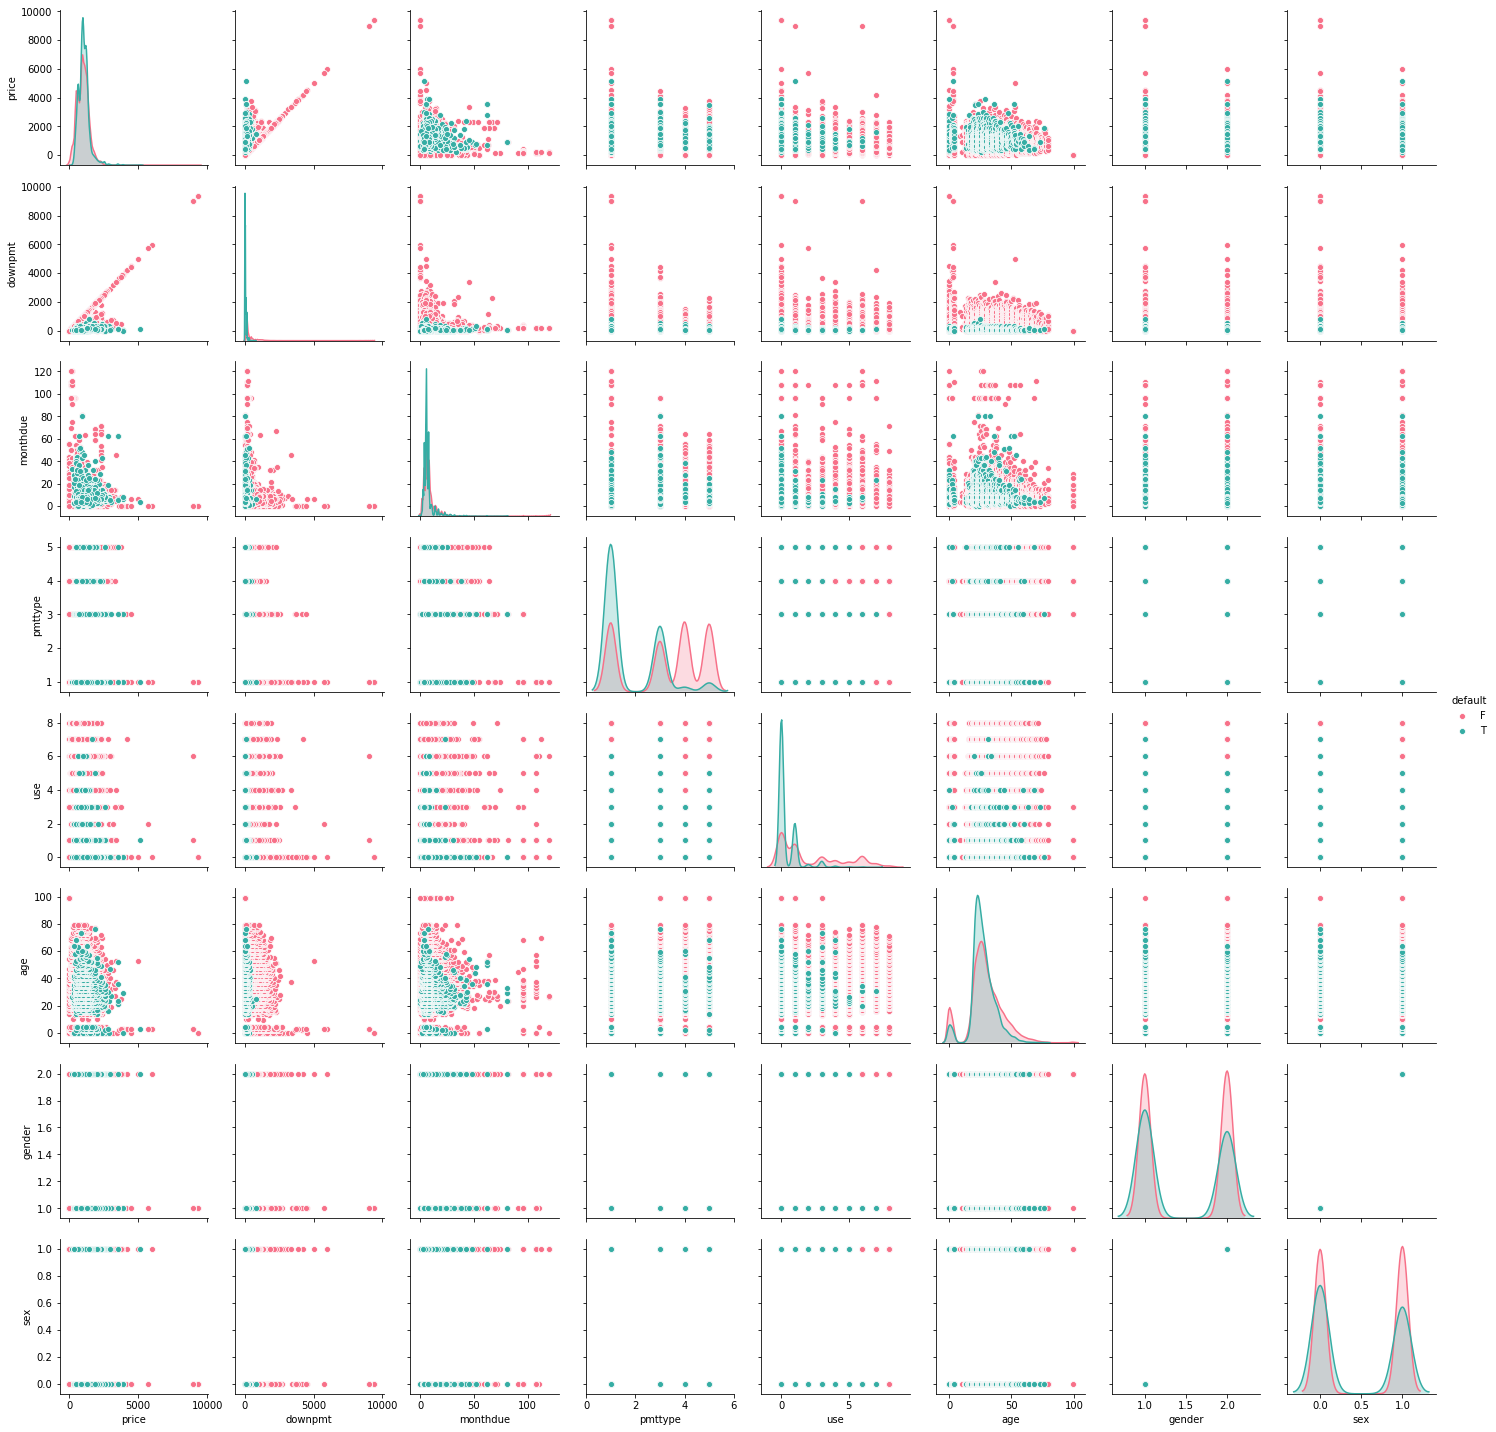

In [23]:
sns.pairplot(dff, hue="default", palette="husl")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24843 entries, 0 to 24842
Data columns (total 11 columns):
enrolldt       24843 non-null int64
price          24843 non-null float64
downpmt        24843 non-null float64
monthdue       24843 non-null float64
pmttype        24843 non-null int64
use            24843 non-null int64
age            24843 non-null int64
gender         24843 non-null int64
default        24843 non-null int64
enrolldt_ts    24843 non-null datetime64[ns]
sex            24843 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 2.1 MB


In [25]:
df.drop('enrolldt',axis=1,inplace=True)

In [26]:
df['use'].unique()

array([1, 0, 7, 3, 8, 4, 6, 5, 2])

In [27]:
df['pmttype'].unique()

array([4, 1, 5, 3])

Text(0, 0.5, 'Number of enroll')

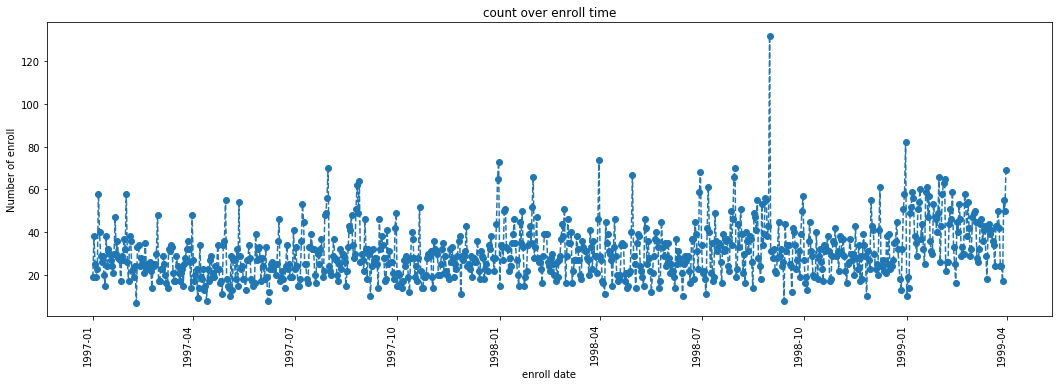

In [28]:
signup_cnt = df.groupby('enrolldt_ts').size().reset_index(name='cnt').sort_values(by='enrolldt_ts')
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(signup_cnt['enrolldt_ts'],signup_cnt['cnt'],'o--')
ax.set_title('count over enroll time')
ax.set_xlabel('enroll date')
fig.autofmt_xdate(rotation=90)
ax.set_ylabel('Number of enroll')

In [29]:
df['day_of_week'] = df['enrolldt_ts'].dt.dayofweek

In [30]:
df['is_weekend'] = np.where(df['day_of_week'].isin([5,6]),1,0)

In [31]:
df['month'] = df['enrolldt_ts'].dt.month

In [32]:
df['default'].mean()

0.11504246669081834

In [33]:
cat_cols = ["pmttype",'day_of_week','month']
for col in cat_cols:
        df[col] = df[col].astype('category')
data = pd.get_dummies(df, columns=cat_cols)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24843 entries, 0 to 24842
Data columns (total 33 columns):
price            24843 non-null float64
downpmt          24843 non-null float64
monthdue         24843 non-null float64
use              24843 non-null int64
age              24843 non-null int64
gender           24843 non-null int64
default          24843 non-null int64
enrolldt_ts      24843 non-null datetime64[ns]
sex              24843 non-null int64
is_weekend       24843 non-null int64
pmttype_1        24843 non-null uint8
pmttype_3        24843 non-null uint8
pmttype_4        24843 non-null uint8
pmttype_5        24843 non-null uint8
day_of_week_0    24843 non-null uint8
day_of_week_1    24843 non-null uint8
day_of_week_2    24843 non-null uint8
day_of_week_3    24843 non-null uint8
day_of_week_4    24843 non-null uint8
day_of_week_5    24843 non-null uint8
day_of_week_6    24843 non-null uint8
month_1          24843 non-null uint8
month_2          24843 non-null uint8
mo

In [35]:
data.columns

Index(['price', 'downpmt', 'monthdue', 'use', 'age', 'gender', 'default',
       'enrolldt_ts', 'sex', 'is_weekend', 'pmttype_1', 'pmttype_3',
       'pmttype_4', 'pmttype_5', 'day_of_week_0', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

In [36]:
data.drop('enrolldt_ts',axis=1,inplace=True)

In [37]:
# For evaluating the model
def scoring(y_test, pred):
    print('Accuracy: {}'.format(metrics.accuracy_score(y_test, pred)))
    print('roc_auc_score : ', metrics.roc_auc_score(y_test, pred))
    print(classification_report(y_test,pred))

In [38]:
X = data.drop('default',axis=1)
y = data['default']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)

In [40]:
m = LogisticRegression(C=0.5, class_weight = 'balanced', penalty ='l2')
m.fit(X_train, y_train)
pred = m.predict(X_test)
scoring( y_test, pred)

Accuracy: 0.8420205272690682
roc_auc_score :  0.868151520982997
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      4397
           1       0.41      0.90      0.57       572

   micro avg       0.84      0.84      0.84      4969
   macro avg       0.70      0.87      0.74      4969
weighted avg       0.92      0.84      0.86      4969



In [41]:
# Baseline RandomForest variable
m = RandomForestClassifier(class_weight = 'balanced')
m.fit(X_train, y_train )

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [42]:
pred = m.predict(X_test)
scoring(y_test, pred)

Accuracy: 0.9120547393841819
roc_auc_score :  0.7100168423798171
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4397
           1       0.68      0.45      0.54       572

   micro avg       0.91      0.91      0.91      4969
   macro avg       0.81      0.71      0.75      4969
weighted avg       0.90      0.91      0.90      4969



In [43]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [44]:
pred = gb.predict(X_test)
scoring(y_test, pred)

Accuracy: 0.9162809418394043
roc_auc_score :  0.7367380174976264
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      4397
           1       0.69      0.50      0.58       572

   micro avg       0.92      0.92      0.92      4969
   macro avg       0.81      0.74      0.77      4969
weighted avg       0.91      0.92      0.91      4969



In [45]:
params = {'learning_rate':[0.15,0.05,0.005], 'n_estimators':[100,1250,1750]}

clf = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = params, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
clf.fit(X_train,y_train)
clf.best_params_, clf.best_score_

({'learning_rate': 0.05, 'n_estimators': 1250}, 0.9465213445902105)

In [67]:
m = GradientBoostingClassifier(n_estimators=1250, learning_rate=0.05,
max_features='sqrt', min_samples_leaf=1,min_samples_split = 2)
m.fit(X_train, y_train)
pred = m.predict(X_test)

Accuracy: 0.9205071442946267
roc_auc_score :  0.7672612525068746
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4397
           1       0.69      0.57      0.62       572

   micro avg       0.92      0.92      0.92      4969
   macro avg       0.82      0.77      0.79      4969
weighted avg       0.92      0.92      0.92      4969



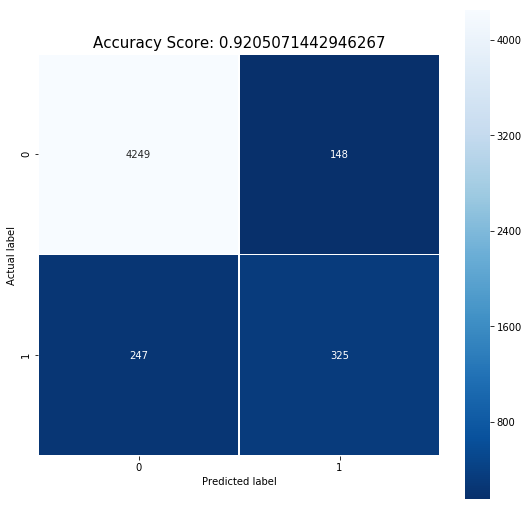

In [68]:
scoring(y_test, pred)
cm = metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score( y_test, pred))
plt.title(all_sample_title, size = 15);

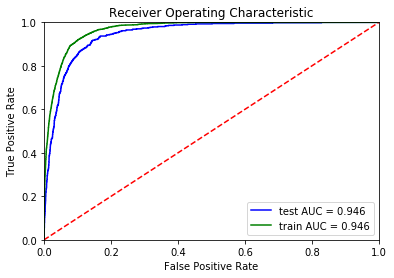

In [69]:
probs = m.predict_proba(X_test)
preds = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve(y_test, preds)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

probs = m.predict_proba(X_train)
preds = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(y_train, preds)
roc_auc_train = metrics.auc(fpr_train, tpr_train)



# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'test AUC = %0.3f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'train AUC = %0.3f' % roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

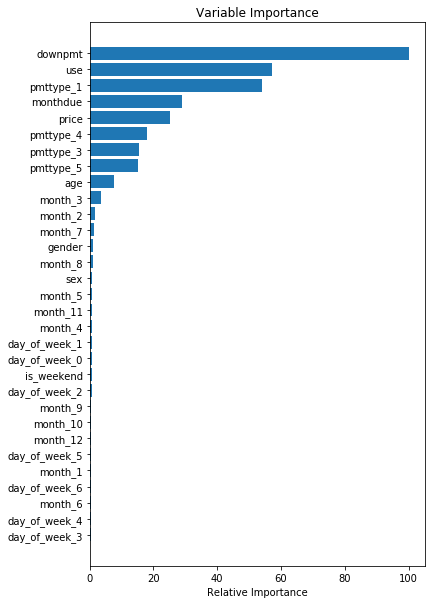

In [70]:
# Plot feature importance
feature_importance = m.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(6,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

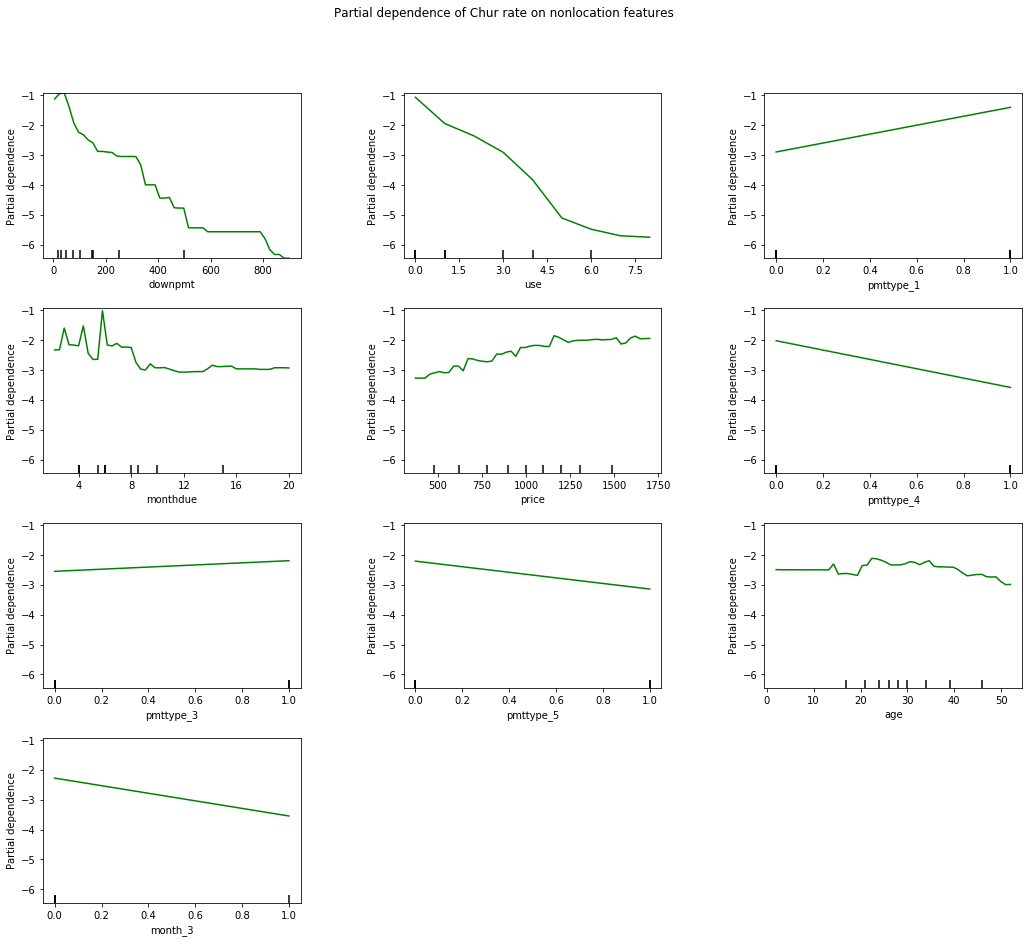

In [71]:
ind = sorted_idx
features = ind[::-1]
fig, axs = plot_partial_dependence(m, X_train, features[0:10],
                                   feature_names=X_test.columns,
                                   n_jobs=3, grid_resolution=50)
fig.suptitle('Partial dependence of Chur rate on nonlocation features')
fig.set_size_inches(16, 15)
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle